# Project Wine

Team Members:

Gabriella Rosal Calit,
Sebastian Bonifasi Sanchez,
Priya Khullar,
KC Kim

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
from numpy import absolute



In [ ]:
wine_data = pd.read_csv("winequality-red.csv")
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

## Ordinary Least Squares (OLS)

In [ ]:
wineQuality = wine_data
wineQuality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wineQuality.sort_values('quality', inplace=True)

In [ ]:
# Added a constant to the independent variables
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.79e-145
Time:                        23:42:46   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

In [ ]:
#Baseline Model
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y, y_pred=regression.predict(X)))
print(first_model)

0.41676716722125007


In [ ]:
#Coefficients_OLS
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_, X.columns) :
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'fixed acidity': 0.024990552675656412,
 'volatile acidity': -1.083590258692188,
 'citric acid': -0.1825639484061993,
 'residual sugar': 0.01633126976610759,
 'chlorides': -1.8742251580848106,
 'free sulfur dioxide': 0.0043613333090892215,
 'total sulfur dioxide': -0.0032645797031345403,
 'density': -17.88116383506437,
 'pH': -0.4136531438094561,
 'sulphates': 0.9163344127157658,
 'alcohol': 0.27619769922229687}

## Ridge Regression

Calculating the cross-validation errors for each alphas with Ridge Regression

In [ ]:
alphas = np.arange(0.1,1.01,0.01)
errors = np.zeros(len(alphas))
i = 0

for alpha in alphas:
    L2_cv = RidgeCV(alphas=[alpha], cv=10, scoring='neg_mean_squared_error').fit(X,y)
    errors[i] = -L2_cv.best_score_
    i += 1

errors

array([0.43425534, 0.43424685, 0.43423872, 0.43423093, 0.43422347,
       0.43421631, 0.43420944, 0.43420285, 0.43419653, 0.43419048,
       0.43418468, 0.43417912, 0.4341738 , 0.4341687 , 0.43416384,
       0.43415918, 0.43415475, 0.43415051, 0.43414648, 0.43414264,
       0.43413898, 0.43413552, 0.43413223, 0.43412912, 0.43412618,
       0.4341234 , 0.43412079, 0.43411833, 0.43411603, 0.43411388,
       0.43411188, 0.43411001, 0.43410829, 0.4341067 , 0.43410525,
       0.43410392, 0.43410272, 0.43410165, 0.43410069, 0.43409985,
       0.43409912, 0.43409851, 0.434098  , 0.4340976 , 0.43409731,
       0.43409711, 0.43409701, 0.43409701, 0.43409711, 0.43409729,
       0.43409756, 0.43409793, 0.43409837, 0.4340989 , 0.43409951,
       0.4341002 , 0.43410097, 0.43410181, 0.43410272, 0.43410371,
       0.43410477, 0.43410589, 0.43410709, 0.43410834, 0.43410966,
       0.43411105, 0.43411249, 0.43411399, 0.43411555, 0.43411717,
       0.43411884, 0.43412056, 0.43412234, 0.43412417, 0.43412

Plotting the alphas vs cross-validation errors

Text(0.5, 1.0, 'Cross-Validation Error vs Alpha')

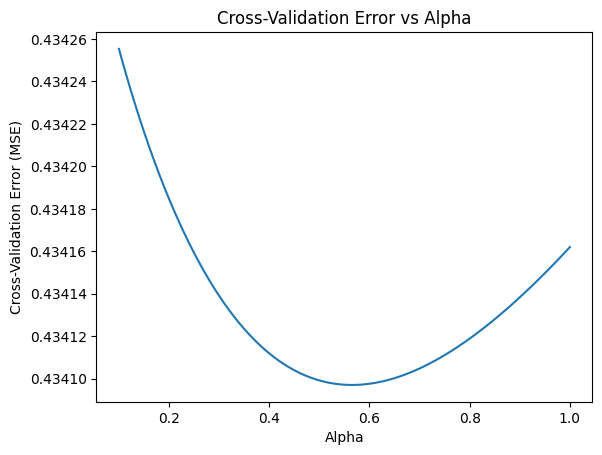

In [ ]:
plt.plot(alphas, errors)
plt.xlabel("Alpha")
plt.ylabel("Cross-Validation Error (MSE)")
plt.title("Cross-Validation Error vs Alpha")

The Optimal Coefficients for Lasso Regression

In [ ]:
L2_cv = RidgeCV(alphas=alphas, cv=10, scoring='neg_mean_squared_error').fit(X,y)
L2_coef = pd.Series(L2_cv.coef_, index=X.columns)
L2_coef

fixed acidity           0.011715
volatile acidity       -1.105811
citric acid            -0.196327
residual sugar          0.008078
chlorides              -1.539256
free sulfur dioxide     0.004489
total sulfur dioxide   -0.003248
density                -0.033193
pH                     -0.461639
sulphates               0.844934
alcohol                 0.296391
dtype: float64

## Lasso Regression

[0.4349207254891259, 0.4343337029859756, 0.43432629719924093, 0.4343191093731312, 0.4343121400300164, 0.4343053968448035, 0.43429920739873706, 0.4342929966613339, 0.43428697322665916, 0.4342811578360376, 0.4342755822979537, 0.4342699763624152, 0.43426502464573985, 0.4342600849370505, 0.43425530878739504, 0.43425051265070147, 0.43424617957670264, 0.43424206317906455, 0.43423819308837086, 0.4342345639312672, 0.4342311244640366, 0.4342278901101544, 0.43422489482812043, 0.43422213546934063, 0.43421958379071574, 0.43421727725685555, 0.43421516709568203, 0.43421329861563346, 0.4342116418149352, 0.4342102000422573, 0.43420898146362746, 0.4342079938415172, 0.43420722410805757, 0.43420665046033474, 0.4342063155221375, 0.4342062138652424, 0.4342063260996559, 0.43420660472930095, 0.43420715897399154, 0.43420793437748645, 0.4342089309397862, 0.43421014866089047, 0.4342115875407993, 0.43421324757951274, 0.434215128777031, 0.43421719192023167, 0.4342194832013603, 0.4342220252693479, 0.43422479123993

Text(0.5, 1.0, 'Error vs Alpha')

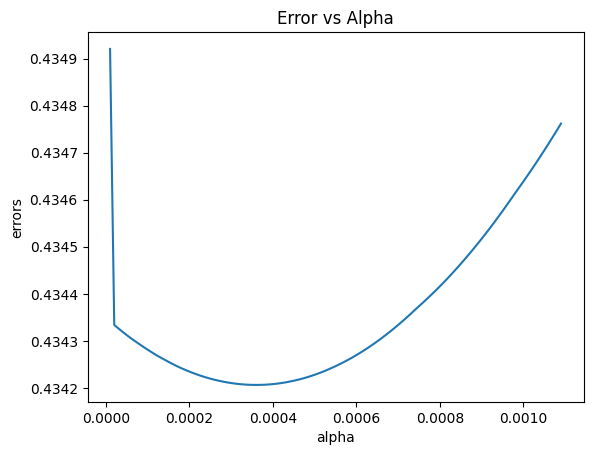

In [ ]:
#plot alpha vs cross validation error
lasso = Lasso(max_iter = 10000)
errors = []
alpha2= np.arange(0.00001, 0.0011, 0.00001)

for alpha in alpha2:
    Lasso_Graph = LassoCV(alphas=[alpha], cv=10).fit(X,y)
    errors += [np.mean(Lasso_Graph.mse_path_)]
print (errors)




plt.plot(alpha2, errors)
plt.xlabel('alpha')
plt.ylabel('errors')
plt.title("Error vs Alpha")

In [ ]:
#table of coeff
L1_cv = LassoCV(alphas=alpha2, cv=10).fit(X,y)
L1_coef = pd.Series(L1_cv.coef_, index=X.columns)
L1_coef

fixed acidity           0.009732
volatile acidity       -1.088788
citric acid            -0.158843
residual sugar          0.007936
chlorides              -1.669697
free sulfur dioxide     0.004549
total sulfur dioxide   -0.003293
density                -0.000000
pH                     -0.453641
sulphates               0.854297
alcohol                 0.293931
dtype: float64

## Elastic Net

In [ ]:
# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic', ElasticNet())])

# Define the grid search
search = GridSearchCV(
    estimator=pipe,
    param_grid={
        'elastic__alpha': np.logspace(-5, 2, 8),
        'elastic__l1_ratio': [0.2, 0.4, 0.6, 0.8]
    },
    scoring='neg_mean_squared_error',
    n_jobs=1,
    refit=True,
    cv=10
)

In [ ]:
search.fit(X,y)
print(search.best_params_)
print(abs(search.best_score_))

{'elastic__alpha': 0.01, 'elastic__l1_ratio': 0.8}
0.43420396645297565


In [ ]:
model_elastic = ElasticNet(alpha=0.01, l1_ratio=0.8)
model_elastic.fit(X,y)
second_model_elastic = (mean_squared_error(y_true=y, y_pred=model_elastic.predict(X)))
print(second_model_elastic)

0.4300141899744741


In [ ]:
ENet = ElasticNetCV(cv=10, l1_ratio=0.8).fit(X,y)
ENet.alpha_

0.006142702345626427

In [ ]:
pd.Series(ENet.coef_, index=X.columns)

fixed acidity           0.030865
volatile acidity       -0.956373
citric acid            -0.000000
residual sugar          0.000000
chlorides              -0.000000
free sulfur dioxide     0.004852
total sulfur dioxide   -0.003083
density                -0.000000
pH                     -0.000000
sulphates               0.514888
alcohol                 0.302855
dtype: float64

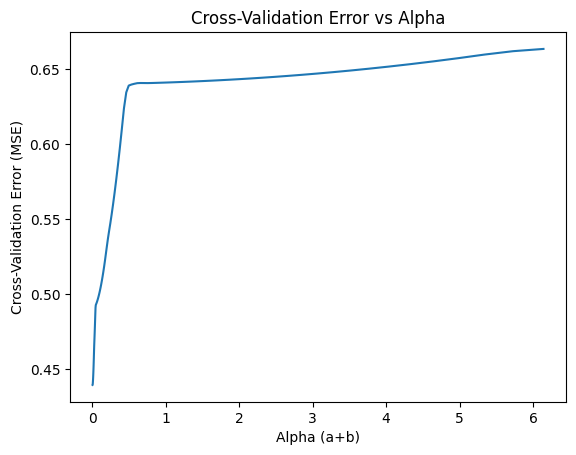

In [ ]:
plt.plot(ENet.alphas_, np.mean(ENet.mse_path_,axis=1))
plt.xlabel('Alpha (a+b)') #a = L1 parameter, b = L2 parameter
plt.ylabel("Cross-Validation Error (MSE)")
plt.title("Cross-Validation Error vs Alpha")
plt.show()